La primera parte de la clase ha sido una explicacion de los conceptos de modulo, por un lado, y de objetos y clases,
por otro. En el ejemplo para la practica utilizamos simplemente funciones como modulo, directamente copiando el 
fichero rng.py que ya se encontraba construido en la carpeta rng.

Voy a añadir pues un ejemplo extra, rngclass.py, en el que implementamos el generador aleatorio usando clases.

In [11]:
seed=24
import random
irr=[0]*256
random.seed(a=int(seed))
def rand():
    return random.randrange(2**16)
for i in range(256):
      low = rand ()
      high = rand ()
      irr[i] = low ^ (high << 16)
ind = ig1 = ig2 = ig3 = 0



In [12]:
irr

[1568457734,
 1437364160,
 1454924640,
 1299656446,
 109220118,
 4018070012,
 241974063,
 4220278361,
 2616517487,
 731185120,
 1354662400,
 2622990171,
 3152487972,
 1835864327,
 2911412704,
 2669552547,
 2112958877,
 4205137485,
 2288488826,
 1701481528,
 4247072747,
 1229213437,
 4119307781,
 1128293718,
 2228024224,
 2083943314,
 1173564231,
 2691990940,
 3360978422,
 2628479424,
 571526811,
 3114201105,
 2151982792,
 3732954874,
 2138353355,
 289979933,
 3872923026,
 3768950793,
 769975743,
 699994927,
 3514738669,
 4271882405,
 3403076018,
 2419945740,
 3194985249,
 1252300402,
 544320537,
 2253392077,
 3601401823,
 3375549673,
 2297926929,
 3281643198,
 2736569893,
 3411346525,
 4134996462,
 585100504,
 1990153793,
 1830043781,
 1148904500,
 417946093,
 705313223,
 2013272763,
 4198501413,
 1573853539,
 2653137500,
 1570583849,
 1209481431,
 4264306764,
 2187107515,
 3955812410,
 3528311237,
 2931314471,
 1641425257,
 1560235656,
 3787211618,
 2423565943,
 1161590498,
 857309079

In [14]:
NormRAN = float(4.656612595521636e-10)
NormRANu= float(0.5*4.656612595521636e-10) 

In [22]:
ig1 = (ind - 24) & 255
ig2 = (ind - 55 ) & 255
ig3 = (ind - 61) & 255
irr[ind] = irr[ig1] + irr[ig2] #aqui hay que truncar int32
irr[ind] &= 4294967295 # posiblemente asi. TO DO
ir1 = (irr[ind] ^ irr[ig3])
ind += 1
ind &= 255
r = ir1 * NormRANu
print(r)

0.08345687450725557


In [23]:
import rng

In [25]:
rng.rng()

0.5557237204012272

In [26]:
rng.rngnpB()

0.23317785125842003

In [27]:
import timeit

In [28]:
%timeit rng.rng()

1.25 µs ± 8.49 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [30]:
%timeit rng.rngnpB()

14.3 µs ± 78.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [34]:
%timeit rng.rngJit(rng.ig,rng.irrnp)

662 ns ± 1.53 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [35]:
import random

In [38]:
%timeit random.randrange(2**32)*rng.NormRANu

938 ns ± 5.79 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [40]:
%timeit random.random()

85.7 ns ± 0.522 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [41]:
listarandom= [rng.rngJit(rng.ig,rng.irrnp) for i in range(100)]
    

In [42]:
listarandom

[0.35837322619195294,
 0.9607959580692043,
 0.04909865661308708,
 0.5062116159614684,
 0.9487573027420126,
 0.44900252438507665,
 0.24962552871924376,
 0.3813466020802185,
 0.391080193194436,
 0.7075730140463675,
 0.6169971579333576,
 0.920943556874626,
 0.5877749839633691,
 0.48556291537729235,
 0.6774278507983451,
 0.8575741139848282,
 0.7416090236855853,
 0.4458963847371094,
 0.7468084888106713,
 0.6852499648407098,
 0.32277378262251305,
 0.4828740391843576,
 0.33467423690561904,
 0.5323702943774863,
 0.6254445090624959,
 0.5931888581588033,
 0.32172069643612405,
 0.04343936729233742,
 0.8566923985925345,
 0.8681634843233355,
 0.05450627185553162,
 0.3968404958510834,
 0.6939114272498208,
 0.2263784546049107,
 0.25306441407080416,
 0.889782047647932,
 0.48066676732834895,
 0.6747311968982227,
 0.784934836918644,
 0.4407712603366353,
 0.5067090716405003,
 0.7417923980627987,
 0.5556311583515291,
 0.2764507227643883,
 0.8658890981069713,
 0.11182539243546728,
 0.5572158001253257,
 0.8

In [46]:
listarandom= (rng.rngJit(rng.ig,rng.irrnp) for i in range(10000))


In [47]:
listarandom

<generator object <genexpr> at 0x000002067D690120>

In [48]:
for r in listarandom:
    if r > 0.999: 
        print("mayor")

mayor
mayor
mayor
mayor
mayor
mayor


In [52]:
x=(rng.rngJit(rng.ig,rng.irrnp) for i in range(1000))
y=(rng.rngJit(rng.ig,rng.irrnp) for i in range(1000))

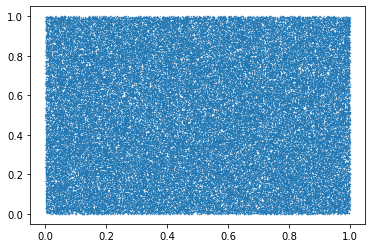

In [56]:
import matplotlib.pyplot as plt
x=(rng.rngJit(rng.ig,rng.irrnp) for i in range(100000))
y=(rng.rngJit(rng.ig,rng.irrnp) for i in range(100000))
plt.scatter(list(x),list(y),s=0.1)

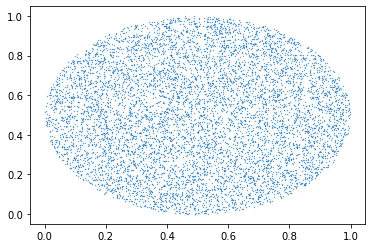

In [60]:
import matplotlib.pyplot as plt
x=(rng.rngJit(rng.ig,rng.irrnp) for i in range(10000))
y=(rng.rngJit(rng.ig,rng.irrnp) for i in range(10000))
circulox=[]
circuloy=[]
for a,b in zip(x,y):
    if (a-0.5)**2 + (b-0.5)**2 < 0.5**2:
        circulox.append(a)
        circuloy.append(b)
plt.scatter(circulox,circuloy,s=0.1)

Estos ejemplos no los hemos visto en clase, se corresponden a la explicacion sobre objetos

In [1]:
from rngclass import *


In [2]:
a=aleatorioNumba(seed=23)
a.rng()

0.36042256111554305

In [3]:
import timeit

In [4]:
%timeit a.rng()

753 ns ± 5.49 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [5]:
a=aleatorio(23)
%timeit a.rng()

1.42 µs ± 2.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [11]:
a=aleatorioNumpy(23)
%timeit a.rng()

40 µs ± 145 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [7]:
from rngclass import *
a=aleatorioBloque(23)
%timeit a.rng()

1.27 µs ± 17.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [8]:
a=aleatorioBloque(163)
b=aleatorioNumpy(163)
sum([ abs(a.rng() - b.rng()) for _ in range(40000)])

0.0

In [9]:
a=aleatorioNumpy(163)
b=aleatorioNumba(163)
sum([ abs(a.rng() - b.rng()) for _ in range(40000)])

0.0

In [10]:
a=aleatorio(163)
b=aleatorioBloque(163)
sum([ abs(a.rng() - b.rng()) for _ in range(40000)])

0.0

Un ejercicio interesante seria tratar de mejorar la velocidad usando las ideas del bloque en numba y en el caso de python puro